In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
ads_data = pd.read_csv('./ads_data.csv', parse_dates=['date', 'time'])

In [8]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [9]:
ads_clients_data = pd.read_csv('./ads_clients_data.csv' , parse_dates=['date', 'create_date'])

In [10]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [11]:
# 1.	Разберемся с распределением количества показов и кликов. 
# Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [12]:
ads_data.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [13]:
event_count = ads_data.groupby(['ad_id','event'], as_index=False).agg({'date':'count'})\
    .rename(columns = {'date':'count'})\
    .pivot(index='ad_id', columns='event', values='count').reset_index()\
    .fillna(0)

In [14]:
event_count

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,0.0,156.0
962,122023,0.0,68.0
963,122031,1.0,138.0


In [15]:
event_count.mean()

event
ad_id    57971.024870
click      113.137824
view       923.131606
dtype: float64

In [16]:
ads_data_view = ads_data.query("event == 'view'").ad_id.value_counts()



In [17]:
ads_data_view_log = np.log(ads_data_view)

In [18]:
# evet_count_log = np.log(event_count)

C:\Users\Omar\AppData\Local\Temp\ipykernel_6600\787145400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ads_data_view_log)
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

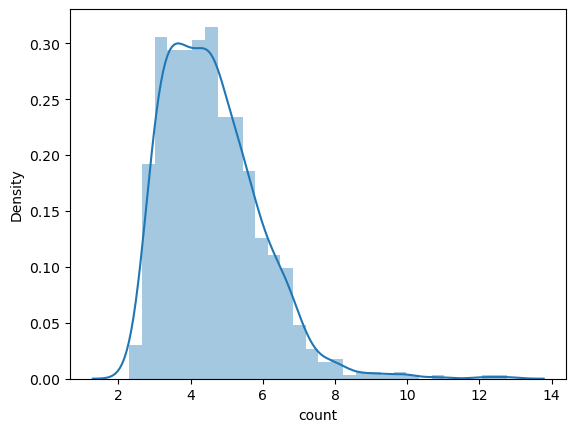

In [19]:
sns.distplot(ads_data_view_log)

In [20]:
# Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). 
# После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.
# Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [94]:
# ads_data_view = ads_data.query("event == 'view'")\
    # .pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')
ads_data_view = ads_data.query("event == 'view'")\
    .groupby(['date', 'ad_id'], as_index=False)\
    .agg({'time':'count'})\
    .pivot(index='ad_id', columns='date', values='time')

In [95]:
ads_data_view_mean = ads_data_view.mean()

In [96]:
ads_data_view

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [97]:
ads_data_view_mean

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [98]:
ads_data_view_mean_rolling = ads_data_view_mean.rolling(window=2).mean().round(0)

In [99]:
ads_data_view_mean_rolling

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [100]:
# 255

In [101]:
# Скользящее среднее часто используется для поиска аномалий в данных. 
# Давайте попробуем нанести на один график значения просто среднего количества показов по дням и 
# скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

# Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
# Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'View rate'),
 Text(0.5, 1.0, 'View rate by day\n')]

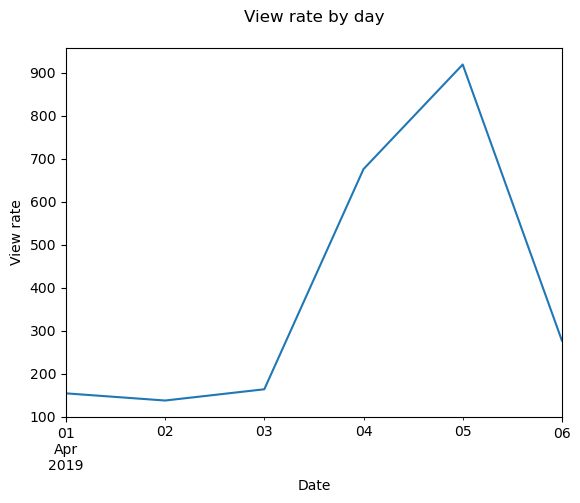

In [107]:
ax = ads_data_view_mean.plot()
ax.set(
    xlabel ="Date", 
    ylabel = "View rate", 
    title ='View rate by day\n')

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

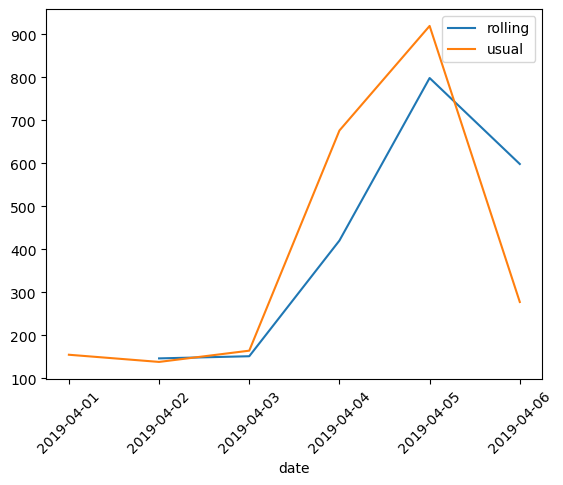

In [104]:
fig, ax = plt.subplots()
sns.lineplot(data=ads_data_view_mean_rolling, ax=ax, label='rolling')
sns.lineplot(data=ads_data_view_mean, ax=ax, label='usual')
ax.tick_params(axis='x', rotation=45)
plt.legend()

In [106]:
# Объедините данные рекламы с данными о рекламных клиентах 
# и найдите среднее количество дней от даты создания рекламного клиента (create_date) 
# и первым запуском рекламного объявления этим клиентом (date).

In [114]:
merged_data = ads_clients_data.merge(ads_data, on='client_union_id', how='inner')

In [120]:
merged_data

,date_x,client_union_id,community_id,create_date,date_y,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 21:54:35,view,android,122078,122078,CPC,56.4,0,32354
999996,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:26:58,view,web,122078,122078,CPC,56.4,0,32354
999997,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:32:34,view,android,122078,122078,CPC,56.4,0,32354
999998,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:43:03,view,ios,122078,122078,CPC,56.4,0,32354


In [117]:
ads_clients_data.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [156]:
merged_data['difference'] = merged_data.date_y - merged_data.create_date 

In [157]:
first_ad = merged_data.groupby('client_union_id')['difference'].min()

In [163]:
first_ad

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: difference, Length: 838, dtype: timedelta64[ns]

In [164]:
threshold = pd.Timedelta(365, unit='day')

In [165]:
It_365 = first_ad.loc[first_ad < threshold]

In [166]:
first_ad.mean()

Timedelta('124 days 09:04:43.532219570')

In [167]:
# Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.
# Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов.
# Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day'))

In [172]:
pd.Timedelta(365, unit='day')

Timedelta('365 days 00:00:00')

In [171]:
np.round(len(It_365) / ads_clients_data.client_union_id.nunique() * 100, 2)

0.69